# Statistics:

## Univariate Statistics:-
Univariate Statistics are required to explore dataset. Uni means one so, the data has only one variable. It discovers association between a variable and the potential predictors. Most of the univariate analysis are based on the linear model.

### The Main Statistical Measures:-
1. Mean: $\bar{x} = \frac{\sum{x_{i}}}{n}$
2. Variance: $Var(X) = E((X-E(X))^2) = E(X^2)-(E(X))^2$, the estimator is: $\sigma^2_{x} = \frac{\sum({x_{i}-\bar{x}})^2}{n-1}$
3. Standard Deviation: $Std(X) = \sqrt{Var(X)}$, the estimator is: $\sigma_{x} = \sqrt{\sigma^2_{x}}$
4. Covariance: $Cov(X,Y) = E((X-E(X))(Y-E(Y))) = E(XY)-E(X)E(Y)$, the estimator is: $\sigma_{xy} = \frac{\sum{(x_{i}-\bar{x})(y_{i}-\bar{y})}}{n}$
5. Correlation: $Cor(X,Y) = \frac{Cov(X,Y)}{Std(X)Std(Y)}$, the estimator is: $\rho_{xy} = \frac{\sigma_{xy}}{\sigma_{x}\sigma_{y}}$
6. Standard Error(SE): $SE(X) = \frac{Std(X)}{\sqrt{n}}$, the estimator is: $SE(\bar{x}) = \frac{\sigma{\bar{x}}}{\sqrt{n}}$

In [13]:
#Generate two random sample: x ~ N(1.78,0.1) and y ~ N(1.66,0.1), both of size 10
import numpy as np
import pandas as pd
import random
x = []
for _ in range(0,10):
    x.append(random.uniform(1.78,0.1))

In [14]:
x

[1.256168957843545,
 1.1115435264165994,
 0.40552125481142,
 1.1708763392422934,
 1.2251789686369121,
 1.0521224690189983,
 0.19076904039553044,
 1.5558050342304153,
 0.7187329034369683,
 1.5330300483968633]

In [15]:
y = []
for _ in range(0,10):
    y.append(random.uniform(1.66,0.1))

In [16]:
y

[0.9778256222516051,
 1.4000916841524818,
 0.6034282193516229,
 1.2011751144202456,
 1.3783220265508354,
 1.2535181244917057,
 1.5491846280355437,
 1.1808848414361075,
 0.5796469291772901,
 1.2200420340970803]

In [20]:
#Compute xbar, xvar and xycov using only the np.sum() operation. Find out which numpy functions performs the same computations.
xbar = np.sum(x)/len(x)
xbar
ybar = np.sum(y)/len(y)
ybar

1.1344119223964517

### Main Distributions:

#### Normal Distribution:-
The normal distribution ($\mathcal{N}$) is useful because of the Central Limit Theorem (CLT) which states that: in a given conditions, the arithmetic mean of a large number of random variables, each with well defined expected value and well defined variance, will be normally distributed.

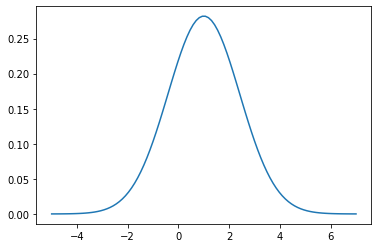

In [29]:
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

mu = 1 #mean
variance = 2
sigma = np.sqrt(variance) #standard deviation
x = np.linspace(mu-3*variance,mu+3*variance, 100)
plt.plot(x, norm.pdf(x, mu, sigma));

#### The Chi- Square Distribution:-
The chi-square distribution ($\chi^2_n$). In this we select the normal population of size n, having standard deviation equals to $\sigma$, when sample s and standard deviation $\sigma$ are equal then we do chi-square. The equation to compute is:<br><br>
$\chi^2 = \frac{[(n-1)*s^2]}{\sigma^2}$<br>
where,<br>
s = sample size,<br>
n = degree of freedom<br>
$\sigma^2$ = variance

#### The Fisher's F- Distribution
The F- Distribution, $F_{n,p}$, with n and p as degree of freedom is the ratio of two independent $\chi^2$ variables. Let X = $\chi^2_{n}$ and Y = $\chi^2_{p}$ then:<br>
$F_{n,p} = \frac{X/n}{Y/p}$<br>
The F- test is used in hypothesis testing

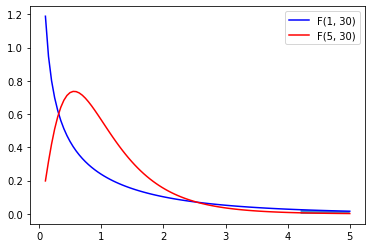

In [24]:
from scipy.stats import f
fvalues = np.linspace(.1, 5, 100)
# pdf(x, df1, df2): Probability density function at x of F.
plt.plot(fvalues, f.pdf(fvalues, 1, 30), 'b-', label="F(1, 30)")
plt.plot(fvalues, f.pdf(fvalues, 5, 30), 'r-', label="F(5, 30)")
plt.legend()
# cdf(x, df1, df2): Cumulative distribution function of F.
# ie.
proba_at_f_inf_3 = f.cdf(3, 1, 30) # P(F(1,30) < 3)
# ppf(q, df1, df2): Percent point function (inverse of cdf) at q of F.
f_at_proba_inf_95 = f.ppf(.95, 1, 30) # q such P(F(1,30) < .95)
assert f.cdf(f_at_proba_inf_95, 1, 30) == .95
# sf(x, df1, df2): Survival function (1 - cdf) at x of F.
proba_at_f_sup_3 = f.sf(3, 1, 30) # P(F(1,30) > 3)
assert proba_at_f_inf_3 + proba_at_f_sup_3 == 1
# p-value: P(F(1, 30)) < 0.05
low_proba_fvalues = fvalues[fvalues > f_at_proba_inf_95]
plt.fill_between(low_proba_fvalues, 0, f.pdf(low_proba_fvalues, 1, 30),
alpha=.8, label="P < 0.05")
plt.show()

#### The Student's t- distribution
Let $M = \mathcal{N}(0,1)$ and $V = \chi^2_{n}$. The t- distribution, $T_{n}$, with n degrees of freedom is the ratio of:<br><br>
$T_{n} = \frac{M}{\sqrt{V/n}}$<br><br>
The distribution of the difference between an estimated parameter and its true (or assumed)
value divided by the standard deviation of the estimated parameter (standard error) follow a
𝑡-distribution.